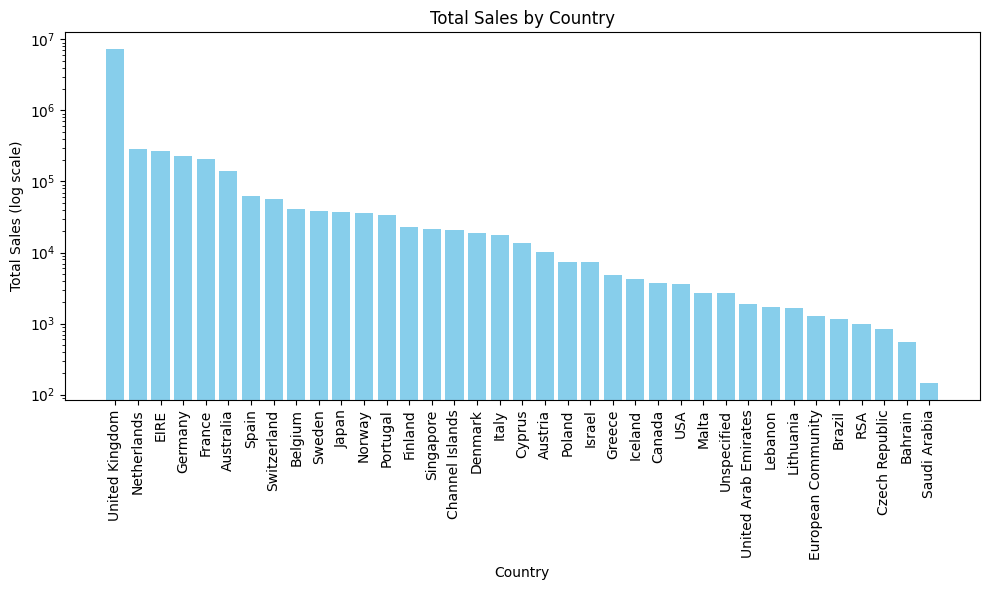

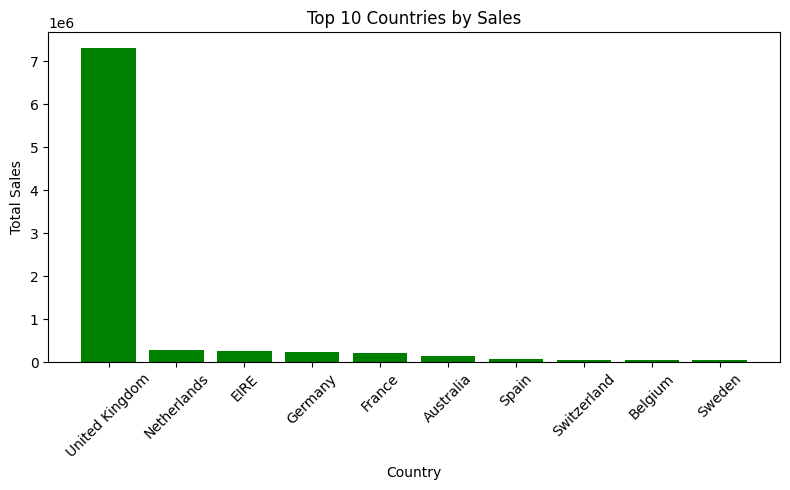

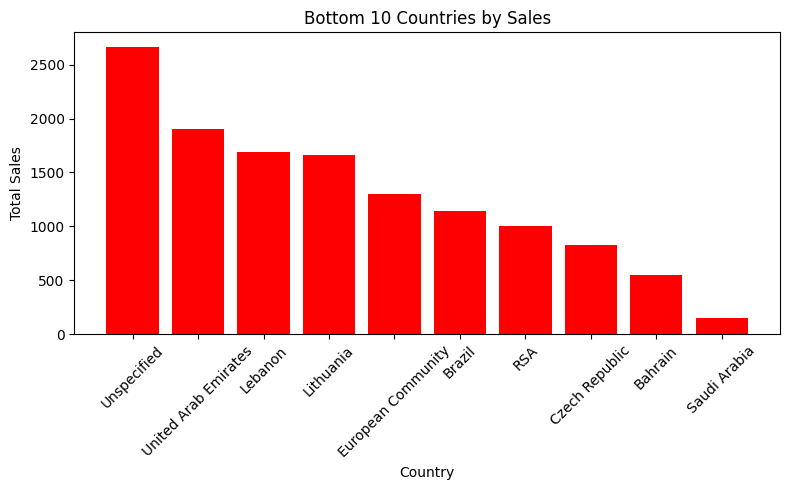

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your SQLite DW
db_path = r"C:\Users\Administrator\OneDrive\Desktop\DSA2040_Practical_Exam_Rita940\Data Warehousing\Task 2\retail_dw.db"
conn = sqlite3.connect(db_path)

# Query total sales by country
query = """
SELECT 
    c.country,
    SUM(sf.total_sales) AS total_sales
FROM SalesFact sf
JOIN Customer c ON sf.customer_id = c.customer_id
GROUP BY c.country
ORDER BY total_sales DESC
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 1. Total Sales by Country (Log Scale) ---
plt.figure(figsize=(10,6))
plt.bar(df['country'], df['total_sales'], color='skyblue')
plt.yscale("log")  # Apply log scale
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Sales (log scale)")
plt.title("Total Sales by Country")
plt.tight_layout()
plt.savefig("sales_by_country_all_log.png", dpi=300)
plt.show()


# 2. Top 10 Countries ---
top10 = df.head(10)
plt.figure(figsize=(8,5))
plt.bar(top10['country'], top10['total_sales'], color='green')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Top 10 Countries by Sales")
plt.tight_layout()
plt.savefig("sales_by_country_top10.png", dpi=300)
plt.show()

# 3. Bottom 10 Countries ---
bottom10 = df.tail(10)
plt.figure(figsize=(8,5))
plt.bar(bottom10['country'], bottom10['total_sales'], color='red')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Bottom 10 Countries by Sales")
plt.tight_layout()
plt.savefig("sales_by_country_bottom10.png", dpi=300)
plt.show()

